In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import qmc 
import functionBank as func
import os
import optimiserBank as opt
import imageio
from PIL import Image
import scienceplots
plt.style.available
plt.style.use(['science', 'notebook'])
from sklearn.preprocessing import MinMaxScaler
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.indicators.igd import IGD
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
from itertools import product
import functionBank

10 DE Iterations, IGD = 30.85051203928911
25 DE Iterations, IGD = 35.192988558862154
50 DE Iterations, IGD = 32.6069180268481
75 DE Iterations, IGD = 28.69460187182436
100 DE Iterations, IGD = 38.078974904120905
200 DE Iterations, IGD = 33.10882112526437
500 DE Iterations, IGD = 35.27037187861364
10 DE Iterations, IGD = 30.56070855273497
25 DE Iterations, IGD = 32.6267684232798
50 DE Iterations, IGD = 38.376805399294874
75 DE Iterations, IGD = 37.92274285224355
100 DE Iterations, IGD = 36.82233000914964
200 DE Iterations, IGD = 36.13478077908654
500 DE Iterations, IGD = 34.59425895540539
10 DE Iterations, IGD = 31.46029604173862
25 DE Iterations, IGD = 34.50312183431212
50 DE Iterations, IGD = 36.383565467910294
75 DE Iterations, IGD = 27.743188756305234
100 DE Iterations, IGD = 38.376434758189596
200 DE Iterations, IGD = 32.877377463264736
500 DE Iterations, IGD = 32.048988993267656
10 DE Iterations, IGD = 35.60693963955369
25 DE Iterations, IGD = 29.38376555416472
50 DE Iterations, I

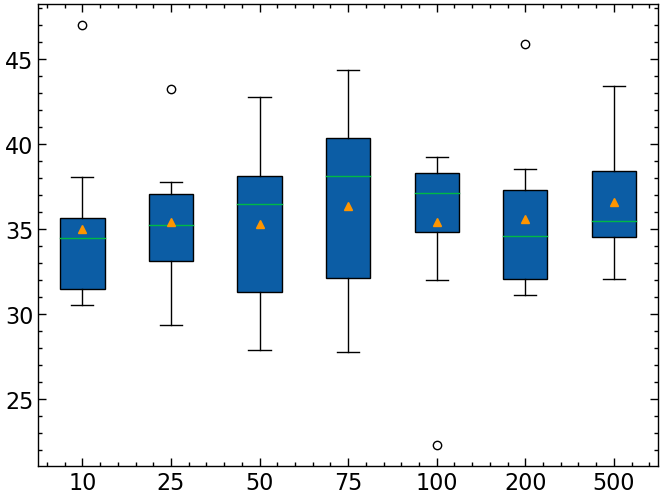

In [2]:
deIters = ['10', '25', '50', '75', '100', '200', '500']
# IGDData = []
n_obj = 5
n_var = 9

problem, bounds = functionBank.getPyMooProblem('dtlz1', n_var, n_obj)
ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=n_obj)
dtlz2Pareto = get_problem('dtlz1').pareto_front(ref_dirs)
ind = IGD(dtlz2Pareto)

# files = glob.glob('/Users/benmoore/projects/elgarMOOOpt/deIterTest3/*')
iterData = np.empty((0,7))
iterDict = {}

for i in range(1,11): 
    IGDData = []
    files = glob.glob(f'/Users/benmoore/projects/elgarMOOOpt/dtlz15objRun1To10/DEdtlz1Run5Obj{i}/*')

    for iterNum in deIters:
        

        for file in files:
            if f'BOObjtvTargetsdtlz1{iterNum}Iter.txt' not in file:
                continue
            ot = np.loadtxt(file)
            print(f'{iterNum} DE Iterations, IGD =', ind(ot))
            IGDData.append(ind(ot))
            otPareto = func.computeParetoShells(ot)[0]
            # plt.scatter(ot[:,0], ot[:,1])
            # plt.scatter(otPareto[:,0], otPareto[:,1])
            # plt.title(f'DTLZ2, {iterNum} DE Iterations')
            # plt.show()
    IGDData = np.array(IGDData)
    # print(IGDData)
    # print(iterData.shape, IGDData.shape)
    iterData = np.vstack((iterData, IGDData))
    # print(iterData)    
meanData = np.mean(iterData, axis=0)
print(meanData)
# for i in range(10):
#     plt.scatter(deIters, iterData[i], alpha=0.5)
plt.boxplot(iterData, labels=deIters, showmeans=True, patch_artist=True)
plt.show()
